# Lab - Customer Analysis Round 2

***

Round 3 starts __[here](#round3)__ and Round 4 is __[here](#round4)__

***

## Importing packages and file

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date

In [2]:
mca = pd.read_excel('marketing_customer_analysis.xlsx')

## Showing dataframe shape

In [3]:
mca.shape

(10910, 26)

## Standardize header names

In [4]:
mca.columns.to_list()

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [5]:
def standardize(col):
    return col.lower().replace(" ","_")

In [6]:
newcolumns=[]
for col in mca.columns.to_list():
    newcolumns.append(standardize(col))

In [7]:
mca.columns=newcolumns

In [8]:
mca.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Numerical Columns

In [9]:
mca.select_dtypes(np.number)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


## Categorical Columns

In [10]:
mca.select_dtypes(include='object')

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## Dealing with NaN values

Checking the amounts

In [11]:
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

Checking for fully empty rows

In [12]:
mca.isna().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10905    False
10906    False
10907    False
10908    False
10909    False
Length: 10910, dtype: bool

Checking the proportions of nulls in each column

In [13]:
nulls=pd.DataFrame(round(mca.isna().sum()/len(mca),4)*100)

In [14]:
nulls=nulls.rename(columns={'index':'header',0:'nulls'})

In [15]:
nulls

,nulls
unnamed:_0,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00


Checking the values of the most nulls in a column: vehicle_type

In [16]:
mca['vehicle_type'].unique()

array([nan, 'A'], dtype=object)

Removing column

In [17]:
cleanmca = mca.drop(['vehicle_type'],axis=1)

Checking values of the vehicle size column

In [18]:
cleanmca['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large', nan], dtype=object)

Filling NaN with unknown

In [19]:
cleanmca['vehicle_size']=cleanmca['vehicle_size'].fillna("Unknown")

Checking values of the vehicle class column

In [20]:
cleanmca['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

Filling NaN with unknown

In [21]:
cleanmca['vehicle_class']=cleanmca['vehicle_class'].fillna("Unknown")

Checking values of the number_of_open_complaints column

In [22]:
cleanmca["number_of_open_complaints"].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

Filling NaN with mean value

In [23]:
nooc_mean=cleanmca["number_of_open_complaints"].mean()

In [24]:
cleanmca['number_of_open_complaints']=cleanmca['number_of_open_complaints'].fillna(nooc_mean)

Checking values of the months_since_last_claim column

In [25]:
cleanmca["months_since_last_claim"].unique()

array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

Filling NaN with mean value

In [26]:
mslc_mean=cleanmca["months_since_last_claim"].mean()

In [27]:
cleanmca['months_since_last_claim']=cleanmca['months_since_last_claim'].fillna(mslc_mean)

Checking values of the response column

In [28]:
cleanmca["response"].unique()

array(['No', 'Yes', nan], dtype=object)

Filling NaN with unknown

In [29]:
cleanmca['response']=cleanmca['response'].fillna("Unknown")

Checking values of the state column

In [30]:
cleanmca["state"].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

Filling NaN with unknown

In [31]:
cleanmca['state']=cleanmca['state'].fillna("Unknown")

Re-checking the amount of nulls in the dataframe

In [32]:
newnulls=pd.DataFrame(round(cleanmca.isna().sum()/len(cleanmca),4)*100)

In [33]:
newnulls

,0
unnamed:_0,0.0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0


## Datetime format

Extracting the months from the dataset and storing them in a separate column

In [34]:
cleanmca["month"]=cleanmca["effective_to_date"].dt.strftime("%b")

In [35]:
cleanmca.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Jan


Showing only the information for January, February and March

In [36]:
cleanmca.query('month in ["Jan","Feb","Mar"]')

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,Jan
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,Jan
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Feb
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,Feb


***

<a id="round3"></a>
## Round 3

### EDA (Exploratory Data Analysis)

In [37]:
import matplotlib.pyplot as plt 
import seaborn as sns

Show DataFrame info

In [38]:
cleanmca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

Describe DataFrame

In [39]:
cleanmca.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Show a plot of the total number of responses (for each response type - "Yes"/"No")

<AxesSubplot:>

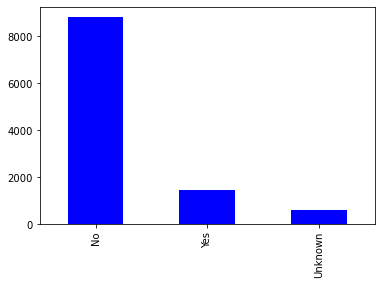

In [40]:
cleanmca["response"].value_counts().plot(kind="bar",color="blue")

Show a plot of the rate of the response types by each Sales Channel

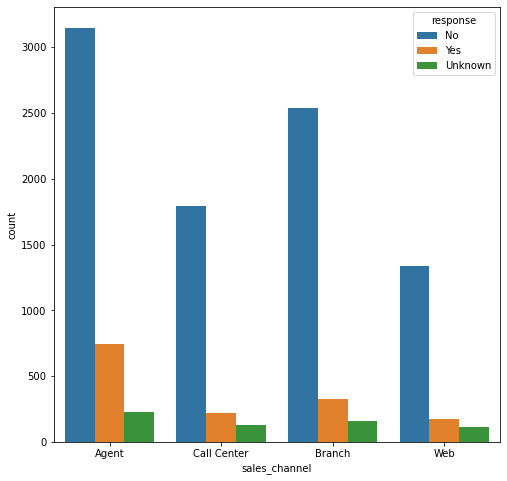

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x="sales_channel",hue="response",data=cleanmca)
plt.show()

Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart

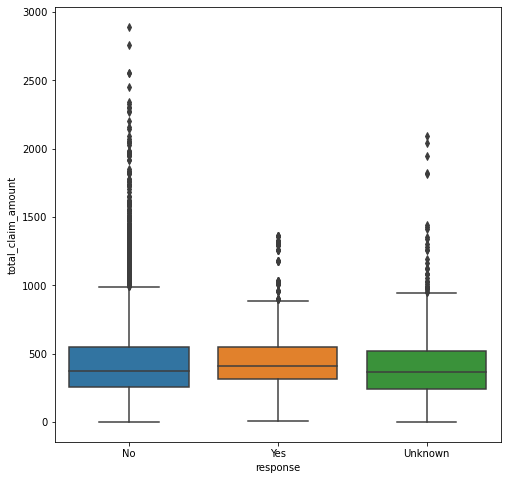

In [42]:
plt.figure(figsize=(8,8))
sns.boxplot(x="response", y="total_claim_amount", data=cleanmca)
plt.show()

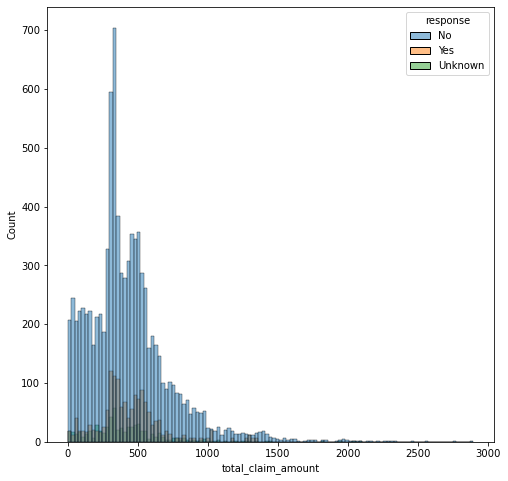

In [43]:
plt.figure(figsize=(8,8))
sns.histplot(data=cleanmca, x="total_claim_amount", hue="response")
plt.show()

Create similar plots like in the task before, but for Income

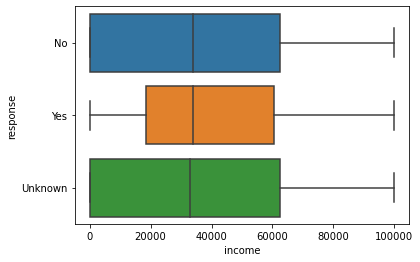

In [44]:
sns.boxplot(x="income", y="response", data=cleanmca)
plt.show()

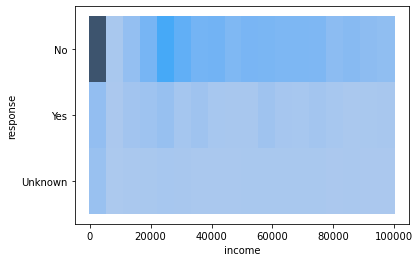

In [45]:
sns.histplot(data=cleanmca, x="income", y="response")
plt.show()

Create a scatterplot between Total Claim Amount and Income, try different settings

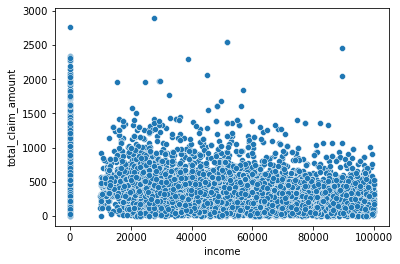

In [46]:
sns.scatterplot(data=cleanmca, x="income", y="total_claim_amount")
plt.show()

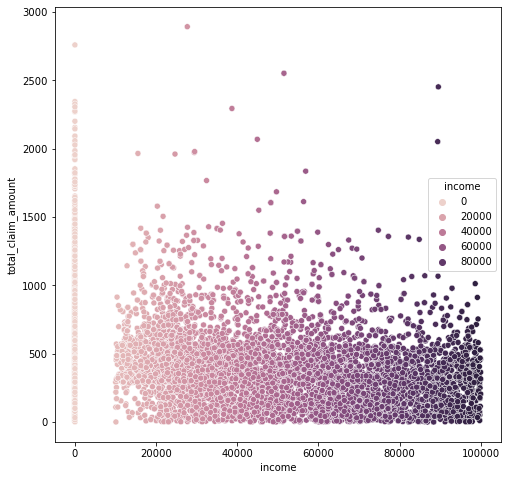

In [47]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=cleanmca, x="income", y="total_claim_amount", hue="income")
plt.show()

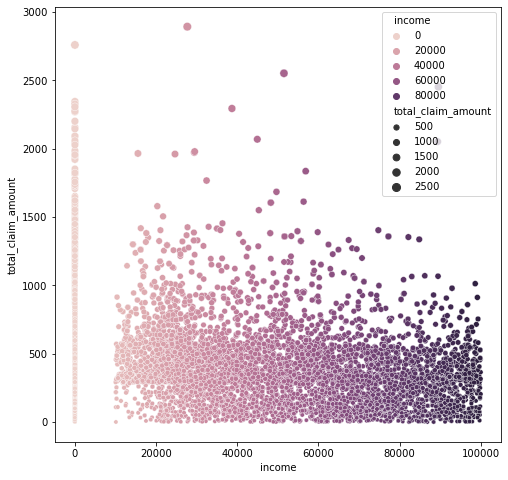

In [48]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=cleanmca, x="income", y="total_claim_amount", hue="income", size="total_claim_amount")
plt.show()

Avoiding overplotting

In [49]:
mcasample=cleanmca.sample(1000)

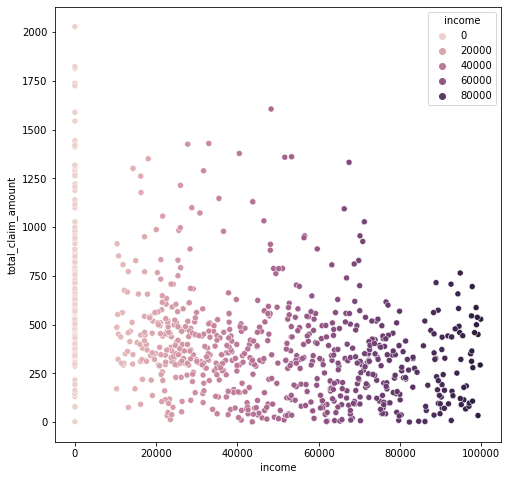

In [50]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=mcasample, x="income", y="total_claim_amount", hue="income")
plt.show()

***

<a id="round4"></a>
## Round 4

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [51]:
cleanmca.dtypes

unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [52]:
numerical=cleanmca._get_numeric_data()

In [53]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer_lifetime_value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly_premium_auto           10910 non-null  int64  
 4   months_since_last_claim        10910 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10910 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


In [54]:
categorical=cleanmca.select_dtypes(include="object")

In [55]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          10910 non-null  object
 1   state             10910 non-null  object
 2   response          10910 non-null  object
 3   coverage          10910 non-null  object
 4   education         10910 non-null  object
 5   employmentstatus  10910 non-null  object
 6   gender            10910 non-null  object
 7   location_code     10910 non-null  object
 8   marital_status    10910 non-null  object
 9   policy_type       10910 non-null  object
 10  policy            10910 non-null  object
 11  renew_offer_type  10910 non-null  object
 12  sales_channel     10910 non-null  object
 13  vehicle_class     10910 non-null  object
 14  vehicle_size      10910 non-null  object
 15  month             10910 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


Use seaborn library to construct distribution plots for the numerical variables

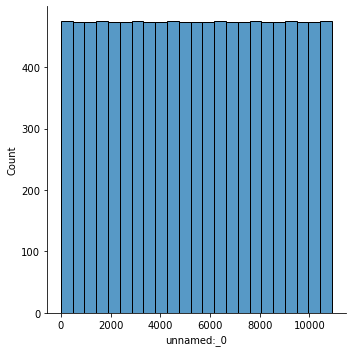

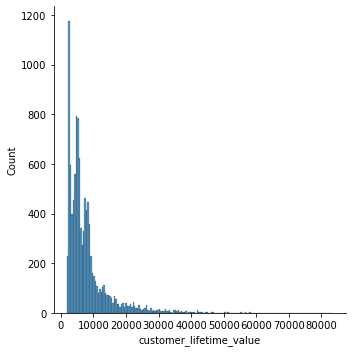

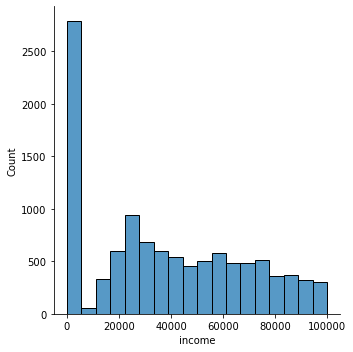

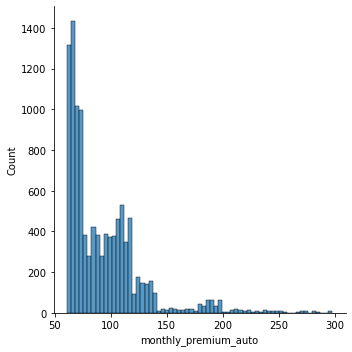

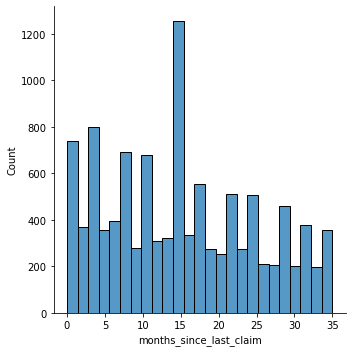

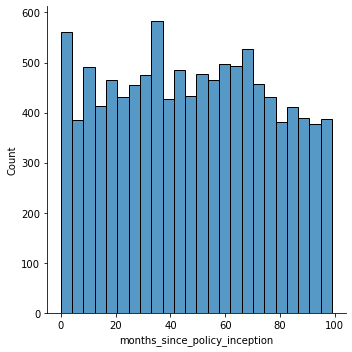

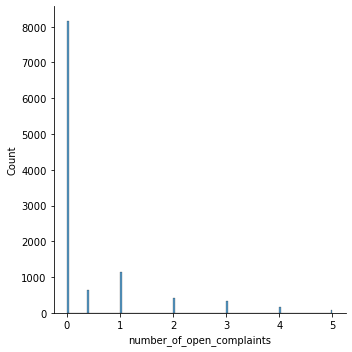

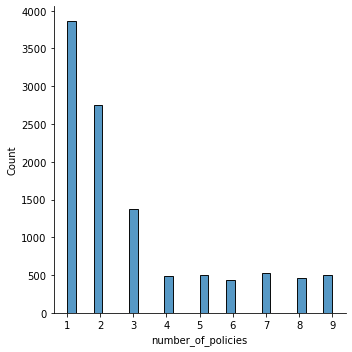

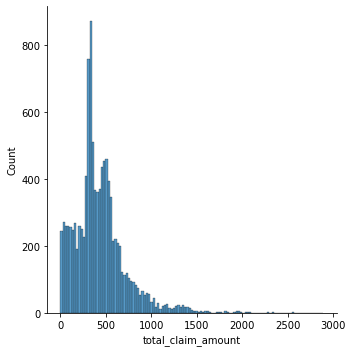

In [56]:
for i in numerical:
    sns.displot(numerical[i])

Use Matplotlib to construct histograms

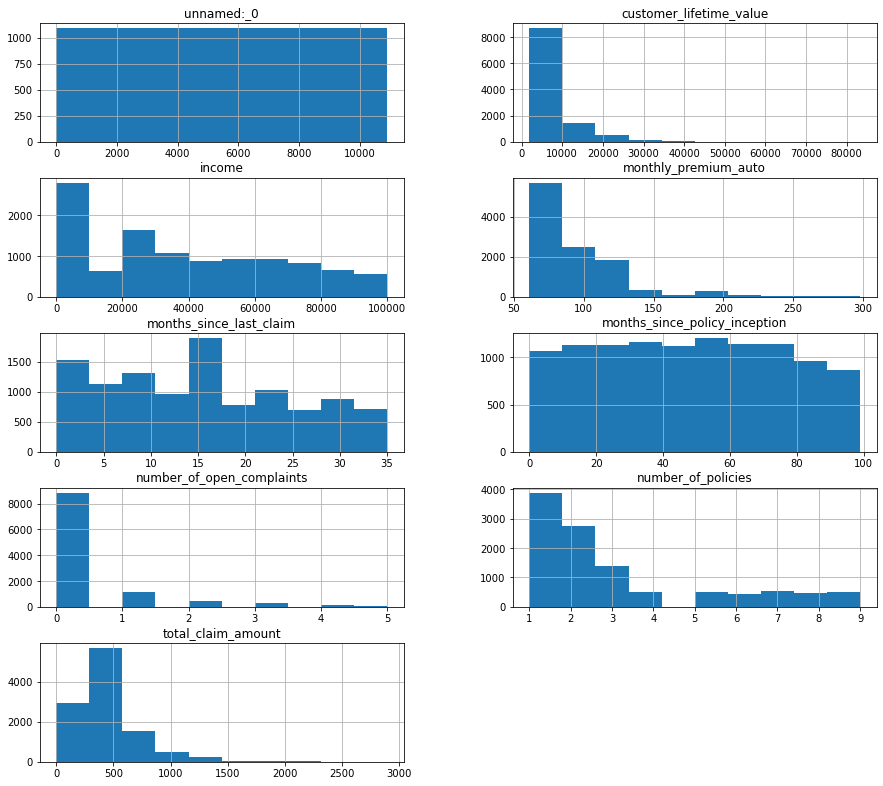

In [57]:
numerical.hist(figsize=(15, 25), layout=(9, 2))
plt.show()

¿Do the distributions for different numerical variables look like a normal distribution?

-Not really

For the numerical variables, check the multicollinearity between the features

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [58]:
correlationmca = numerical
correlations_matrix = correlationmca.corr()
correlations_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000


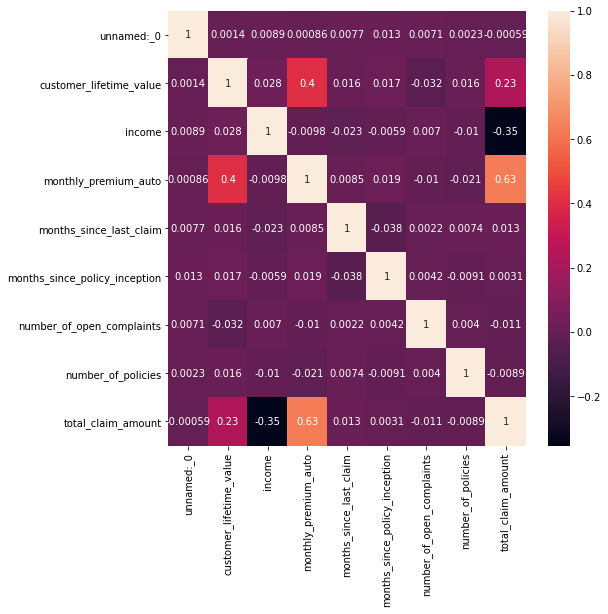

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(correlations_matrix, annot=True)
plt.show()